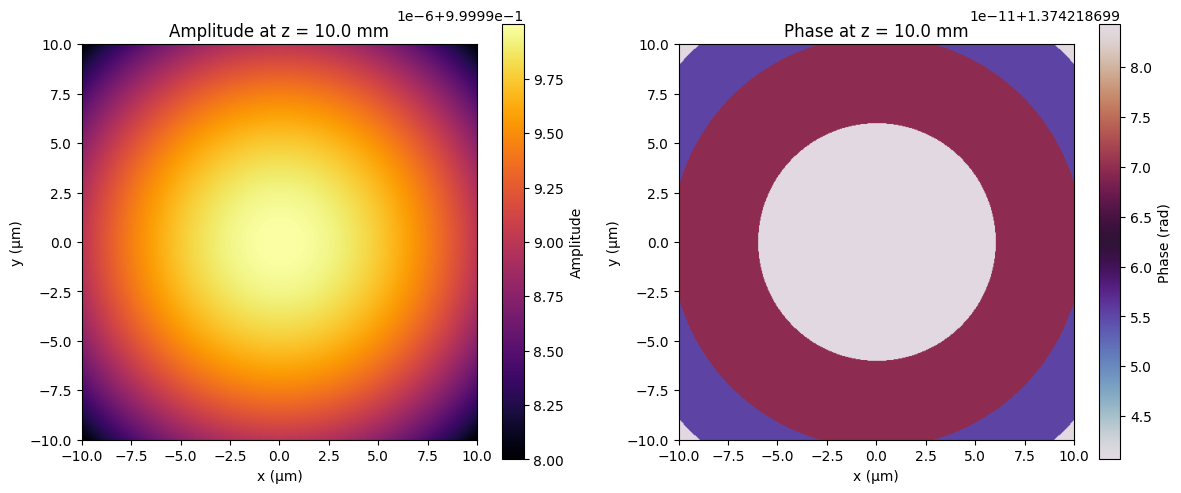

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
wavelength = 0.6328  # 波长 (μm)
w0 = 10000.0             # 束腰半径 (μm)
d = 10.0             # 离束腰位置距离 (mm)
d_um = d * 1000      # 转换为μm

# 计算瑞利长度
zR = np.pi * w0**2 / wavelength

# 计算传播到z=d处的束宽
w_z = w0 * np.sqrt(1 + (d_um / zR)**2)

# 计算曲率半径
R_z = d_um * (1 + (zR / d_um)**2)

# 计算Gouy相位
gouy = np.arctan(d_um / zR)

# 空间网格
x = np.linspace(-10, 10, 500)  # μm
y = np.linspace(-10, 10, 500)
X, Y = np.meshgrid(x, y)
r2 = X**2 + Y**2

# 计算光场
E = (w0 / w_z) * np.exp(-r2 / w_z**2) * np.exp(
    -1j * (2 * np.pi / wavelength) * d_um
    -1j * np.pi * r2 / (wavelength * R_z)
    +1j * gouy
)

# 幅值和相位
amplitude = np.abs(E)
phase = np.angle(E)

# 可视化
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Amplitude at z = %.1f mm" % d)
plt.imshow(amplitude, extent=[x[0], x[-1], y[0], y[-1]], cmap='inferno')
plt.xlabel('x (μm)')
plt.ylabel('y (μm)')
plt.colorbar(label='Amplitude')

plt.subplot(1,2,2)
plt.title("Phase at z = %.1f mm" % d)
plt.imshow(phase, extent=[x[0], x[-1], y[0], y[-1]], cmap='twilight')
plt.xlabel('x (μm)')
plt.ylabel('y (μm)')
plt.colorbar(label='Phase (rad)')

plt.tight_layout()
plt.show()

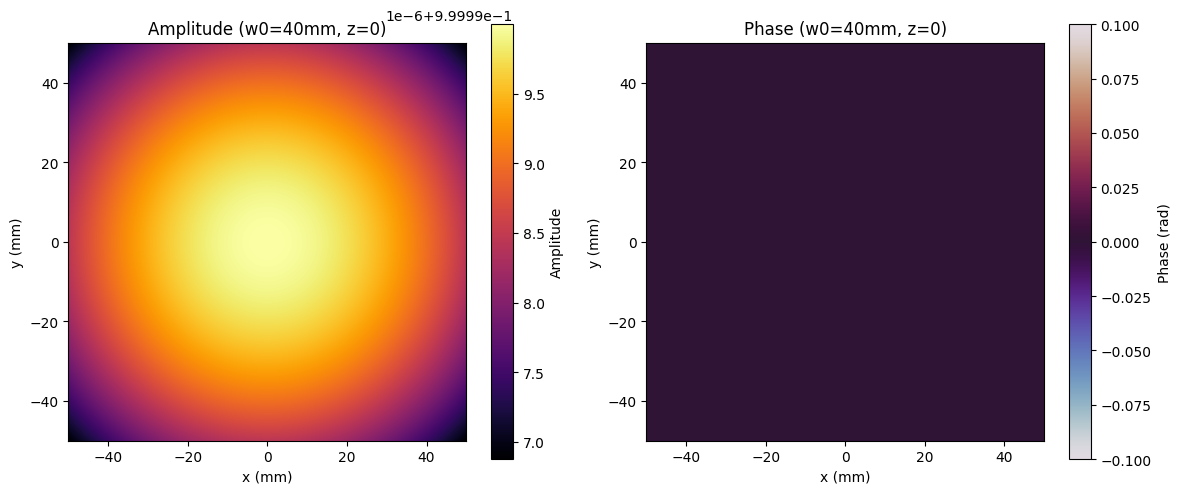

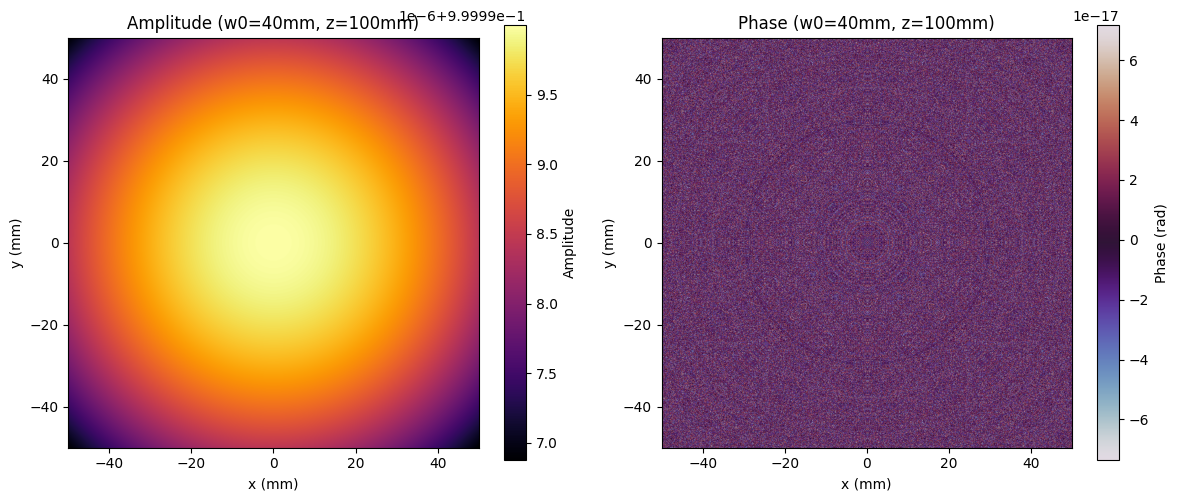

In [6]:
# 00模激光参数
w0_1 = 0.5 * 1000  # 初始束腰半径，单位μm
w0_2 = 40 * 1000   # 扩束后束腰半径，单位μm
wavelength = 0.6328  # 波长，单位μm

# 瑞利长度
zR_1 = np.pi * w0_1**2 / wavelength
zR_2 = np.pi * w0_2**2 / wavelength

# 取扩束后z=0截面
x2 = np.linspace(-50, 50, 1000)  # μm
y2 = np.linspace(-50, 50, 1000)
X2, Y2 = np.meshgrid(x2, y2)
r2_2 = X2**2 + Y2**2

# 光场表达式（z=0截面）
E2 = np.exp(-r2_2 / w0_2**2)

amplitude2 = np.abs(E2)
phase2 = np.angle(E2)

# 可视化
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Amplitude (w0=40mm, z=0)")
plt.imshow(amplitude2, extent=[x2[0], x2[-1], y2[0], y2[-1]], cmap='inferno')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar(label='Amplitude')

plt.subplot(1,2,2)
plt.title("Phase (w0=40mm, z=0)")
plt.imshow(phase2, extent=[x2[0], x2[-1], y2[0], y2[-1]], cmap='twilight')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar(label='Phase (rad)')

plt.tight_layout()
plt.show()

# 传播距离
d2 = 100.0  # mm
d2_um = d2 * 1000  # 转换为μm

# 计算传播到z=d2处的束宽
w_z2 = w0_2 * np.sqrt(1 + (d2_um / zR_2)**2)

# 计算曲率半径
R_z2 = d2_um * (1 + (zR_2 / d2_um)**2)

# 计算Gouy相位
gouy2 = np.arctan(d2_um / zR_2)

# 空间网格
X2, Y2 = np.meshgrid(x2, y2)
r2_2 = X2**2 + Y2**2

# 计算传播后光场
E2_prop = (w0_2 / w_z2) * np.exp(-r2_2 / w_z2**2) * np.exp(
    -1j * (2 * np.pi / wavelength) * d2_um
    -1j * np.pi * r2_2 / (wavelength * R_z2)
    +1j * gouy2
)

amplitude2_prop = np.abs(E2_prop)
phase2_prop = np.angle(E2_prop)
# 修正：相位全为0通常是因为复数光场的全局相位被抵消或未正确计算
# 这里我们可以将传播后的相位中心化（去除全局相位），只显示空间分布
phase2_prop = np.angle(E2_prop * np.exp(-1j * np.angle(E2_prop[0,0])))

# 可视化
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.title("Amplitude (w0=40mm, z=100mm)")
plt.imshow(amplitude2_prop, extent=[x2[0], x2[-1], y2[0], y2[-1]], cmap='inferno')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar(label='Amplitude')

plt.subplot(1,2,2)
plt.title("Phase (w0=40mm, z=100mm)")
plt.imshow(phase2_prop, extent=[x2[0], x2[-1], y2[0], y2[-1]], cmap='twilight')
plt.xlabel('x (mm)')
plt.ylabel('y (mm)')
plt.colorbar(label='Phase (rad)')

plt.tight_layout()
